# **SynDaCaTE**: A Synthetic Dataset For Evaluating Part-Whole Hierarchical Inference

Hello 👋 This is the public notebook accompanying our paper "SynDaCaTE: A Synthetic Dataset For Evaluating Part-Whole Hierarchical Inference", to appear at the [MOSS (Methods and Opportunities at Small Scale)](https://sites.google.com/view/moss2025/home?authuser=0) workshop at [ICML 2025](https://icml.cc/virtual/2025/events/workshop).

Our code is written as an installable Python package with a CLI. In this notebook we clone and install our package from our [public GitHub repository](https://github.com/jakelevi1996/syndacate-public), run commands using our CLI, and display the results below.

All models trained for the results in our paper are reasonably small and train reasonably quickly (< 40 minutes, or 70 minutes in Colab) on reasonably good hardware. However, sweeping over 3 independent variables (model type, random seed, training sample size/depth) means training a large number of models, beyond what is reasonable in a small notebook.

Therefore, rather than replicating ALL results from the paper in this notebook, we instead demonstrate results which support the main claims in the paper. Commands to replicate all results from the paper can be found in the README of our [public GitHub repository](https://github.com/jakelevi1996/syndacate-public), in sections [Full classification data-efficiency sweeps](https://github.com/jakelevi1996/syndacate-public?tab=readme-ov-file#full-classification-data-efficiency-sweeps) and [Full PartsToChars depth sweeps](https://github.com/jakelevi1996/syndacate-public?tab=readme-ov-file#full-partstochars-depth-sweeps).

In particular, we only demonstrate results for a **single random seed** in this notebook, and for data efficiency sweeps we demonstrate results using **training sample size = 300**, since this sample size appears to separate out the different models most clearly. For depth sweeps we demonstrate results for **depth = 5** (the deepest set-function models considered in the paper, with the best performance).

A summary of the results in this notebook is shown below (training durations do not include time taken for dataset generation, which is approximately 5-10 minutes per dataset when running in Colab):

Model | Dataset (subset size) | Training duration | Metric type | Train metric | Test metric
----- | ------- | ------------ | ----------- | ------------ | -----------
CNN | ImToClass (300) | 4m 11.44s | Accuracy | 1.00000 | 0.58820
CapsNet | ImToClass (300) | 8m 14.59s | Accuracy | 0.99333 | 0.21010
CNN | ImToParts | 1h 10m 59s | Chamfer MSE | 0.02367 | 0.02669
CNN | PreTrainedPartsToClass (300) | 37.6287s | Accuracy | 1.00000 | 0.75200
CapsNet | PreTrainedPartsToClass (300) | 9m  1.74s | Accuracy | 1.00000 | 0.74740
SetTransformer | PartsToChars | 18m 10.02s | MSE | 0.01953 | 0.02211
DeepSetToSet | PartsToChars | 6m 54.80s | MSE | 1.21829 | 2.06104
SetTransformer | PartsToClass (300) | 1m  3.12s | Accuracy | 1.00000 | 0.92800
MLP (flat) | PartsToClass (300) | 21.5744s | Accuracy | 1.00000 | 0.37500
MLP (flat, 10xS) | PartsToClass (300) | 3m 25.83s | Accuracy | 1.00000 | 0.36510

The total running time for training models in this notebook is 2 hours and 3 minutes (using Colab free tier and a T4 GPU).


In [1]:
# Installation
!python -m pip install -U pip
!python -m pip install -U jutility==0.0.28
!python -m pip install -U juml-toolkit==0.0.5
!git clone https://github.com/jakelevi1996/syndacate-public.git
!python -m pip install -e ./syndacate-public
%cd syndacate-public

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [jutility]
Cloning into 'syndacate-public'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 43 (delta 4), reused 39 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 1.03 MiB | 12.57 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Obtaining file:///content/syndacate-public
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for syndacate_public (pyproject.t

In [2]:
!syndacate plotsyndacate

Loading from "./data/syndacate_aFfTh100n400o1p4rTs1u10w100.npz"
Could not find "./data/syndacate_aFfTh100n400o1p4rTs1u10w100.npz", generating now...
Creating image 400/400 | 100.0 % | t+     2.6690s | t-     0.0000s | ETA 2025-06-20 23:40:18 | *************************
Saving in "./data/syndacate_aFfTh100n400o1p4rTs1u10w100.npz"
Loading from "./data/syndacate_aFfTh100n400o3p12rTs3u10w100.npz"
Could not find "./data/syndacate_aFfTh100n400o3p12rTs3u10w100.npz", generating now...
Creating image 400/400 | 100.0 % | t+     2.8088s | t-     0.0000s | ETA 2025-06-20 23:40:21 | *************************
Saving in "./data/syndacate_aFfTh100n400o3p12rTs3u10w100.npz"
Loading from "./data/words_h100n400o3s0u10w100.npz"
Could not find "./data/words_h100n400o3s0u10w100.npz", generating now...
Creating image 400/400 | 100.0 % | t+     8.2905s | t-     0.0000s | ETA 2025-06-20 23:40:29 | *************************
Saving in "./data/words_h100n400o3s0u10w100.npz"
Saving in "results/plot_syndacate.png"
T

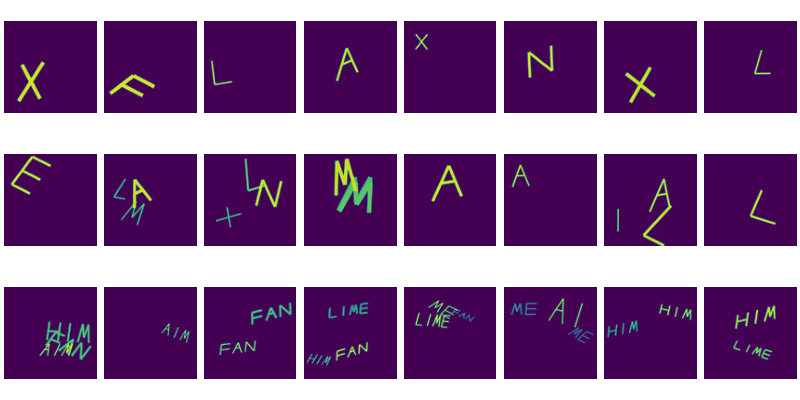

In [3]:
from jutility import plotting
plotting.show_ipython("results/plot_syndacate.png")

In [ ]:
# CNN, ImToClass
!syndacate train \
  --dataset ImToClass \
  --model RzCnn \
  --model.RzCnn.embedder CoordConv \
  --model.RzCnn.pooler Average2d \
  --trainer BpSpDe \
  --trainer.BpSpDe.n_train 300 \
  --trainer.BpSpDe.steps 5000 \
  --devices 0

cli: ImToClass()
Loading from "./data/syndacate_aFfTh100n70000o1p4rTs1u10w100.npz"
Could not find "./data/syndacate_aFfTh100n70000o1p4rTs1u10w100.npz", generating now...
Creating image 70000/70000 | 100.0 % | t+   7m 53.62s | t-     0.0000s | ETA 2025-05-27 22:57:08 | *************************
Saving in "./data/syndacate_aFfTh100n70000o1p4rTs1u10w100.npz"
cli: CoordConv()
cli: Average2d()
cli: RzCnn(blocks_per_stage=2, embedder=CoordConv(num_params=0), expand_ratio=2.0, input_shape=[70000, 1, 100, 100], kernel_size=5, model_dim=64, num_stages=3, output_shape=[10], pooler=Average2d(num_params=0), stride=2)
cli: CrossEntropy()
cli: Adam(lr=0.001, params=<generator object Module.parameters at 0x78d97564ce40>)
Time        | Step       | Epoch      | Batch      | Batch loss | Train metric | Test metric 
----------- | ---------- | ---------- | ---------- | ---------- | ------------ | ------------
0.0177s     |          0 |          0 |            |            |      0.13333 |      0.10260
3.

In [ ]:
# CapsNet, ImToClass
!syndacate train \
  --dataset ImToClass \
  --model CapsNet \
  --trainer BpSpDe \
  --trainer.BpSpDe.n_train 300 \
  --trainer.BpSpDe.steps 5000 \
  --devices 0

cli: ImToClass()
Loading from "./data/syndacate_aFfTh100n70000o1p4rTs1u10w100.npz"
Could not find "./data/syndacate_aFfTh100n70000o1p4rTs1u10w100.npz", generating now...
Creating image 70000/70000 | 100.0 % | t+   6m 47.67s | t-     0.0000s | ETA 2025-05-28 07:40:16 | *************************
Saving in "./data/syndacate_aFfTh100n70000o1p4rTs1u10w100.npz"
cli: CapsNet(input_shape=[70000, 1, 100, 100], output_shape=[10], routing_iterations=3)
cli: CrossEntropy()
cli: Adam(lr=0.001, params=<generator object Module.parameters at 0x7b92adc60e40>)
Time        | Step       | Epoch      | Batch      | Batch loss | Train metric | Test metric 
----------- | ---------- | ---------- | ---------- | ---------- | ------------ | ------------
0.0424s     |          0 |          0 |            |            |      0.13000 |      0.09930
4.5890s     |          0 |          0 |          0 |    2.30258 |              |             
5.0284s     |          5 |          1 |          2 |    2.32018 |          

In [ ]:
# CNN, ImToParts
!syndacate train \
  --dataset ImToParts \
  --model RzCnn \
  --model.RzCnn.embedder CoordConv \
  --model.RzCnn.pooler LinearSet2d \
  --trainer.BpSp.epochs 100 \
  --devices 0 \
  --model_name CNN_ImToParts

cli: ImToParts()
Loading from "./data/syndacate_aFfTh100n70000o1p4rTs1u10w100.npz"
Could not find "./data/syndacate_aFfTh100n70000o1p4rTs1u10w100.npz", generating now...
Creating image 70000/70000 | 100.0 % | t+   6m 53.50s | t-     0.0000s | ETA 2025-05-28 08:29:55 | *************************
Saving in "./data/syndacate_aFfTh100n70000o1p4rTs1u10w100.npz"
cli: CoordConv()
cli: LinearSet2d()
cli: RzCnn(blocks_per_stage=2, embedder=CoordConv(num_params=0), expand_ratio=2.0, input_shape=[70000, 1, 100, 100], kernel_size=5, model_dim=64, num_stages=3, output_shape=[70000, 9, 6], pooler=LinearSet2d(num_params=0), stride=2)
cli: ChamferMse()
cli: Adam(lr=0.001, params=<generator object Module.parameters at 0x7bbc3b174e40>)
Time        | Epoch      | Batch      | Batch loss | Train metric | Test metric 
----------- | ---------- | ---------- | ---------- | ------------ | ------------
0.0004s     |          0 |            |            |      7.75093 |      7.69878
13.1525s    |          0 |    

Loading from "results/train/CNN_ImToParts/args.json"
cli: ImToParts()
Loading from "./data/syndacate_aFfTh100n70000o1p4rTs1u10w100.npz"
cli: CoordConv()
cli: LinearSet2d()
cli: RzCnn(blocks_per_stage=2, embedder=CoordConv(num_params=0), expand_ratio=2.0, input_shape=[70000, 1, 100, 100], kernel_size=5, model_dim=64, num_stages=3, output_shape=[70000, 9, 6], pooler=LinearSet2d(num_params=0), stride=2)
Loading from "results/train/CNN_ImToParts/model.pth"
Saving in "results/train/CNN_ImToParts/part_predictions.png"
Time taken for `plotpartpredictions` = 6.9447 seconds


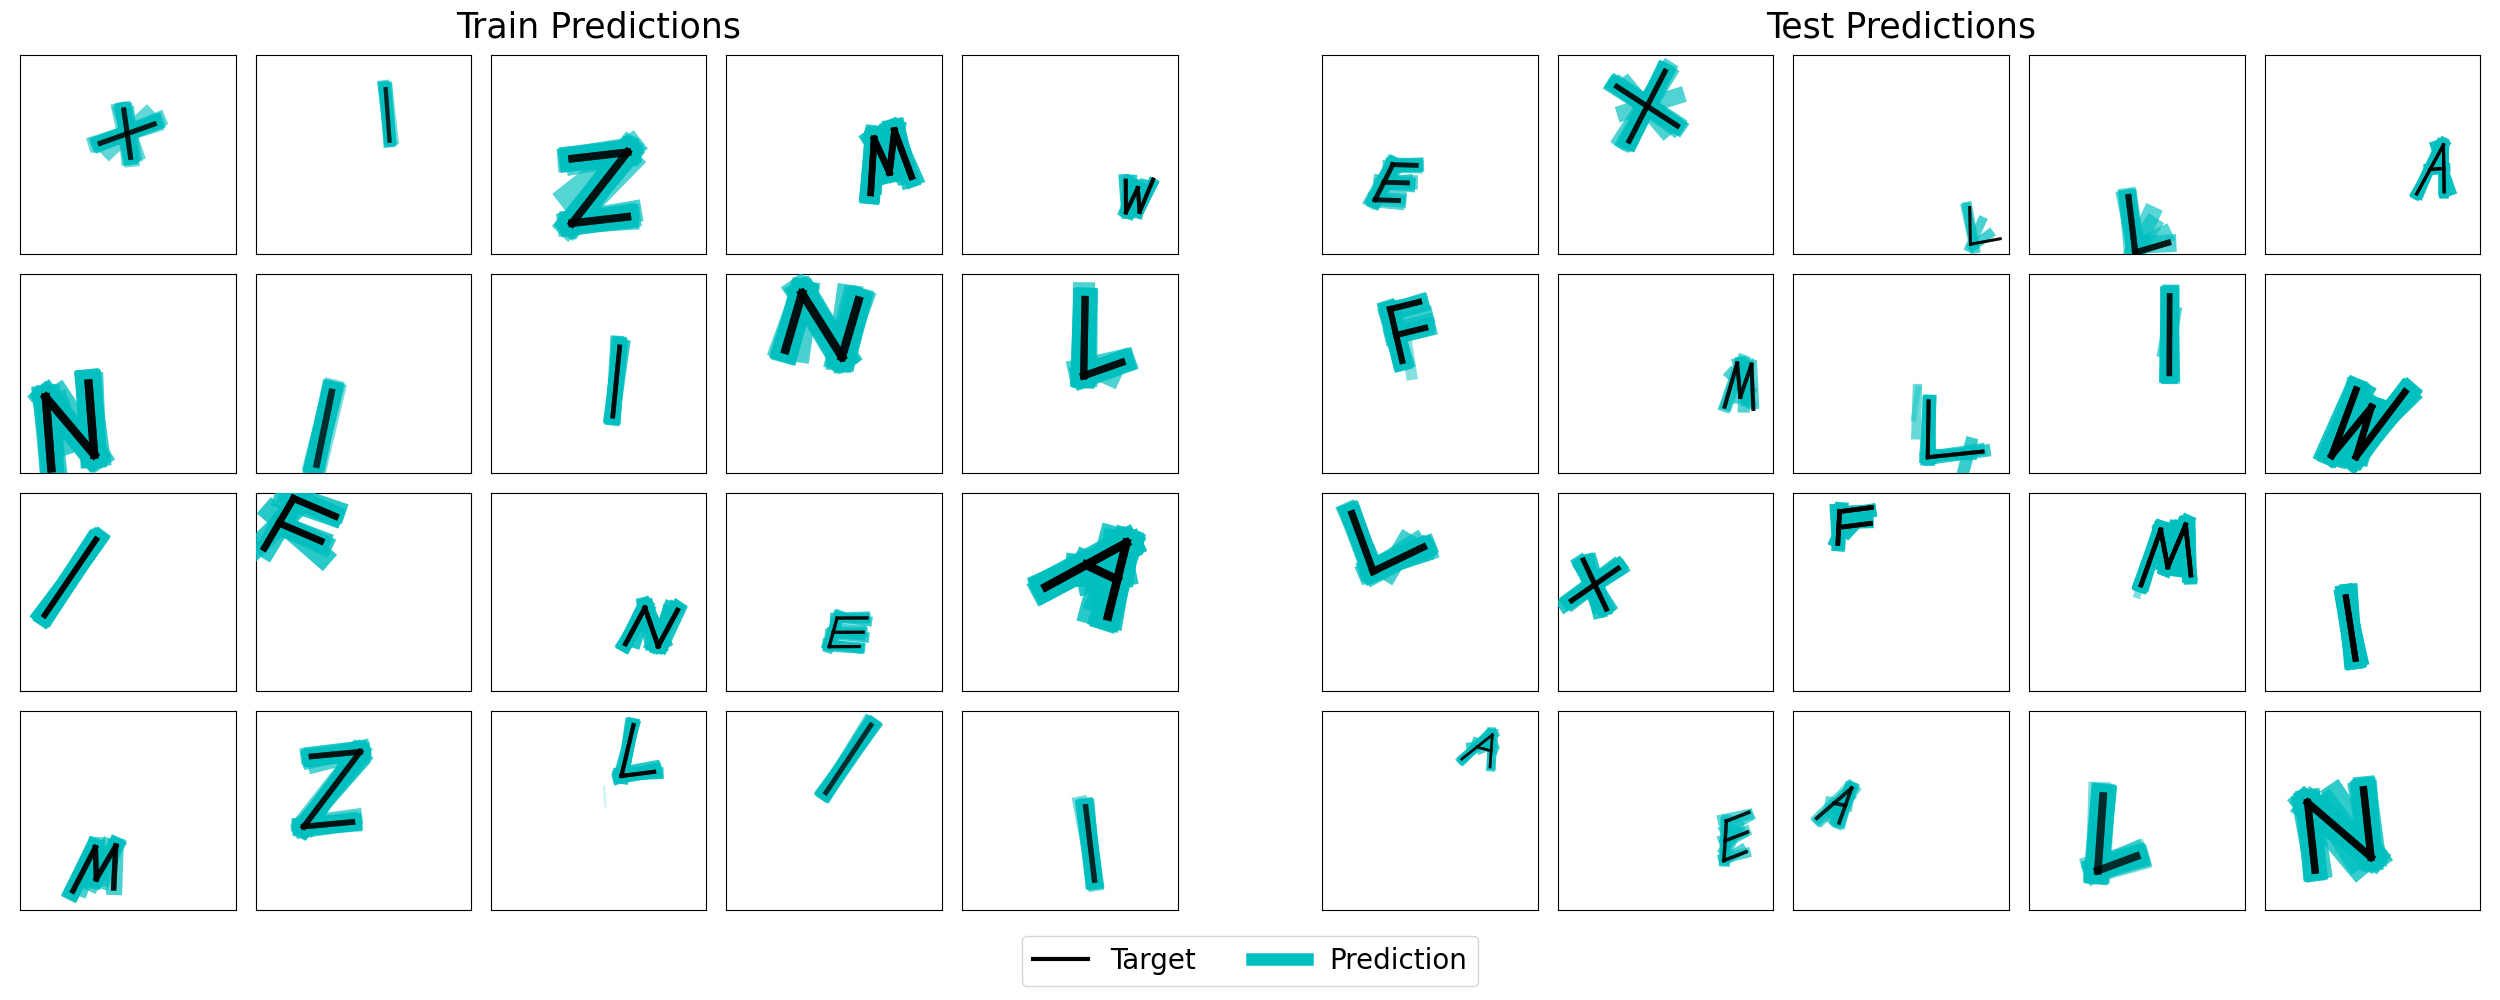

In [ ]:
!syndacate plotpartpredictions --model_name CNN_ImToParts
from jutility import plotting
plotting.show_ipython("results/train/CNN_ImToParts/part_predictions.png")

In [ ]:
# CNN, PreTrainedPartsToClass
!syndacate train \
  --dataset PreTrainedPartsToClass \
  --model RzCnn \
  --model.RzCnn.embedder CoordConv \
  --model.RzCnn.pooler Average2d \
  --model.RzCnn.num_stages 1 \
  --model.RzCnn.blocks_per_stage 3 \
  --model.RzCnn.stride 1 \
  --trainer BpSpDe \
  --trainer.BpSpDe.n_train 300 \
  --trainer.BpSpDe.steps 5000 \
  --devices 0

cli: PreTrainedPartsToClass()
Loading from "./data/PreTrainedPartsToClass.npz"
Could not find "./data/PreTrainedPartsToClass.npz", generating now...
Loading from "/content/syndacate-public/results/train/dIP_lCH_mRZCb2eCk5m64n3pLs2x2.0_tBb100e100lCle1E-05oAol0.001_s3/model.pth"
Loading from "./data/syndacate_aFfTh100n70000o1p4rTs1u10w100.npz"
600/600 | 100.0 % | t+  11m 13.61s | t-     0.0000s | ETA 2025-05-28 09:53:23 | *************************
100/100 | 100.0 % | t+    54.0144s | t-     0.0000s | ETA 2025-05-28 09:54:18 | *************************
cli: CoordConv()
cli: Average2d()
cli: RzCnn(blocks_per_stage=3, embedder=CoordConv(num_params=0), expand_ratio=2.0, input_shape=[64, 9, 9], kernel_size=5, model_dim=64, num_stages=1, output_shape=[10], pooler=Average2d(num_params=0), stride=1)
cli: CrossEntropy()
cli: Adam(lr=0.001, params=<generator object Module.parameters at 0x7dad2faa1540>)
Time        | Step       | Epoch      | Batch      | Batch loss | Train metric | Test metric 
--

In [ ]:
# CapsNet, PreTrainedPartsToClass
!syndacate train \
  --dataset PreTrainedPartsToClass \
  --model CapsNet \
  --trainer BpSpDe \
  --trainer.BpSpDe.n_train 300 \
  --trainer.BpSpDe.steps 5000 \
  --devices 0

cli: PreTrainedPartsToClass()
Loading from "./data/PreTrainedPartsToClass.npz"
cli: CapsNet(input_shape=[64, 9, 9], output_shape=[10], routing_iterations=3)
cli: CrossEntropy()
cli: Adam(lr=0.001, params=<generator object Module.parameters at 0x7ec074ed0e40>)
Time        | Step       | Epoch      | Batch      | Batch loss | Train metric | Test metric 
----------- | ---------- | ---------- | ---------- | ---------- | ------------ | ------------
0.0114s     |          0 |          0 |            |            |      0.09333 |      0.10040
3.8896s     |          0 |          0 |          0 |    2.30337 |              |             
4.0801s     |          2 |          0 |          2 |    2.31708 |              |             
5.0958s     |         12 |          4 |          0 |    2.26807 |              |             
6.0070s     |         21 |          7 |          0 |    2.13494 |              |             
7.0213s     |         31 |         10 |          1 |    2.04785 |              |  

In [ ]:
# SetTransformer, PartsToChars
!syndacate train \
  --dataset PartsToChars \
  --model SetTransformer \
  --model.SetTransformer.depth 5 \
  --trainer.BpSp.epochs 100 \
  --devices 0 \
  --model_name SetTransformer_PartsToChars

cli: PartsToChars()
Loading from "./data/syndacate_aTfTh100n70000o3p12rTs3u10w100.npz"
Could not find "./data/syndacate_aTfTh100n70000o3p12rTs3u10w100.npz", generating now...
Creating image 70000/70000 | 100.0 % | t+   8m 46.46s | t-     0.0000s | ETA 2025-05-28 10:14:41 | *************************
Saving in "./data/syndacate_aTfTh100n70000o3p12rTs3u10w100.npz"
cli: Identity()
cli: Identity()
cli: SetTransformer(depth=5, embedder=Identity(num_params=0), expand_ratio=2.0, heads=8, input_shape=[70000, 25, 6], model_dim=64, output_shape=[70000, 25, 18], pooler=Identity(num_params=0))
cli: AlignedSetMse()
cli: Adam(lr=0.001, params=<generator object Module.parameters at 0x7a8737fe8e40>)
Time        | Epoch      | Batch      | Batch loss | Train metric | Test metric 
----------- | ---------- | ---------- | ---------- | ------------ | ------------
0.0004s     |          0 |            |            |    181.49194 |    181.41967
3.3279s     |          0 |          0 |  178.99385 |             

Loading from "results/train/SetTransformer_PartsToChars/args.json"
cli: PartsToChars()
Loading from "./data/syndacate_aTfTh100n70000o3p12rTs3u10w100.npz"
cli: Identity()
cli: Identity()
cli: SetTransformer(depth=5, embedder=Identity(num_params=0), expand_ratio=2.0, heads=8, input_shape=[70000, 25, 6], model_dim=64, output_shape=[70000, 25, 18], pooler=Identity(num_params=0))
Loading from "results/train/SetTransformer_PartsToChars/model.pth"
Saving in "results/train/SetTransformer_PartsToChars/char_predictions.png"
Time taken for `plotcharpredictions` = 4.2668 seconds


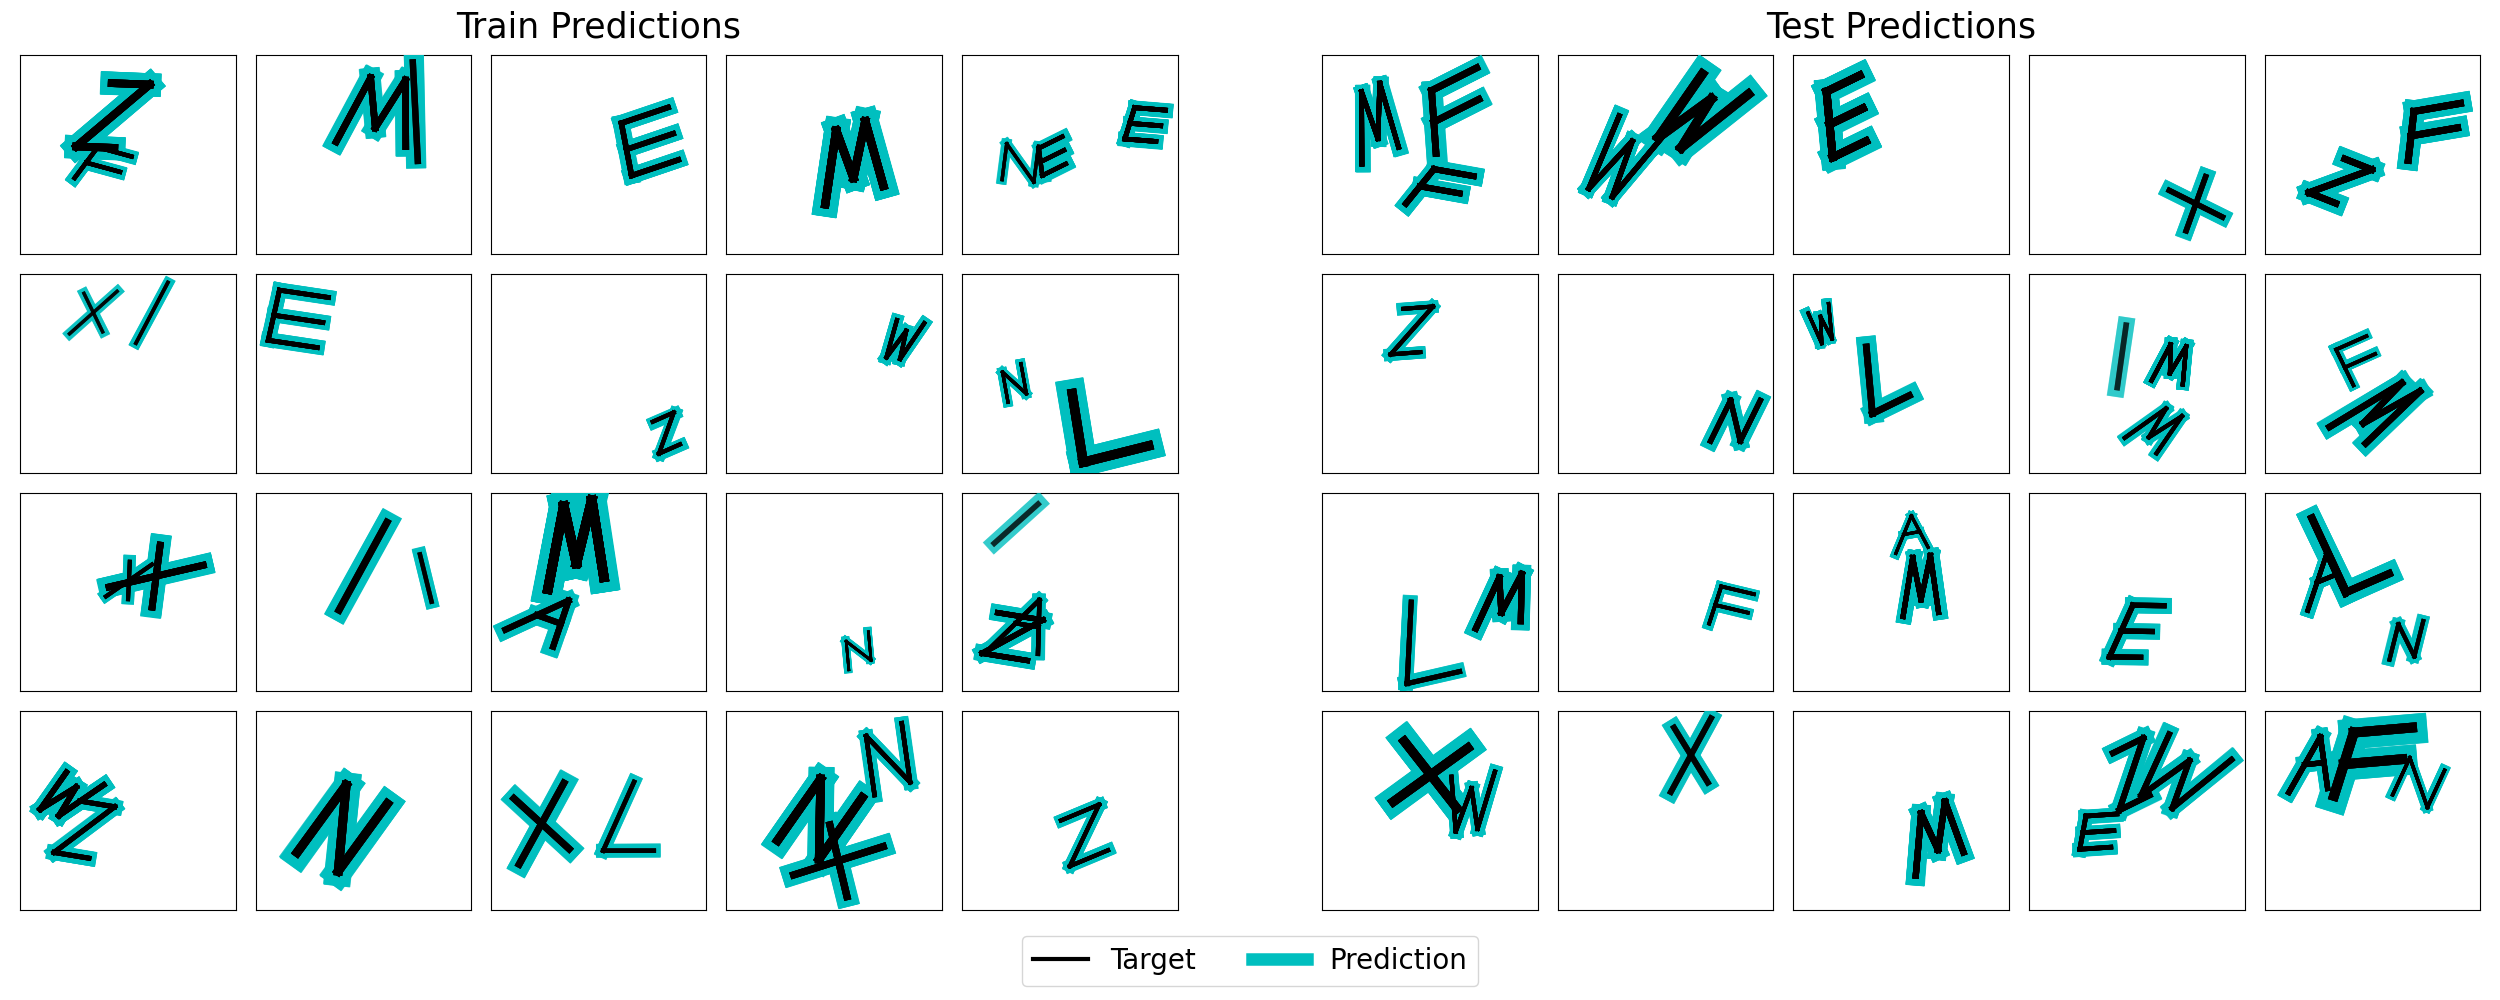

In [ ]:
!syndacate plotcharpredictions --model_name SetTransformer_PartsToChars
from jutility import plotting
plotting.show_ipython("results/train/SetTransformer_PartsToChars/char_predictions.png")

In [ ]:
# DeepSetToSet, PartsToChars
!syndacate train \
  --dataset PartsToChars \
  --model DeepSetToSet \
  --model.DeepSetToSet.depth 5 \
  --trainer.BpSp.epochs 100 \
  --devices 0 \
  --model_name DeepSetToSet_PartsToChars

cli: PartsToChars()
Loading from "./data/syndacate_aTfTh100n70000o3p12rTs3u10w100.npz"
cli: Identity()
cli: Identity()
cli: DeepSetToSet(depth=5, embedder=Identity(num_params=0), hidden_dim=100, input_shape=[70000, 25, 6], output_shape=[70000, 25, 18], pooler=Identity(num_params=0))
cli: AlignedSetMse()
cli: Adam(lr=0.001, params=<generator object Module.parameters at 0x7c8f46928e40>)
Time        | Epoch      | Batch      | Batch loss | Train metric | Test metric 
----------- | ---------- | ---------- | ---------- | ------------ | ------------
0.0010s     |          0 |            |            |     48.19908 |     48.33571
1.5502s     |          0 |          0 |   48.63958 |              |             
2.0016s     |          0 |        102 |   11.64917 |              |             
3.0040s     |          0 |        328 |   10.08247 |              |             
4.0016s     |          0 |        552 |    8.90275 |              |             
4.2258s     |          0 |        599 |    8.

Loading from "results/train/DeepSetToSet_PartsToChars/args.json"
cli: PartsToChars()
Loading from "./data/syndacate_aTfTh100n70000o3p12rTs3u10w100.npz"
cli: Identity()
cli: Identity()
cli: DeepSetToSet(depth=5, embedder=Identity(num_params=0), hidden_dim=100, input_shape=[70000, 25, 6], output_shape=[70000, 25, 18], pooler=Identity(num_params=0))
Loading from "results/train/DeepSetToSet_PartsToChars/model.pth"
Saving in "results/train/DeepSetToSet_PartsToChars/char_predictions.png"
Time taken for `plotcharpredictions` = 4.2088 seconds


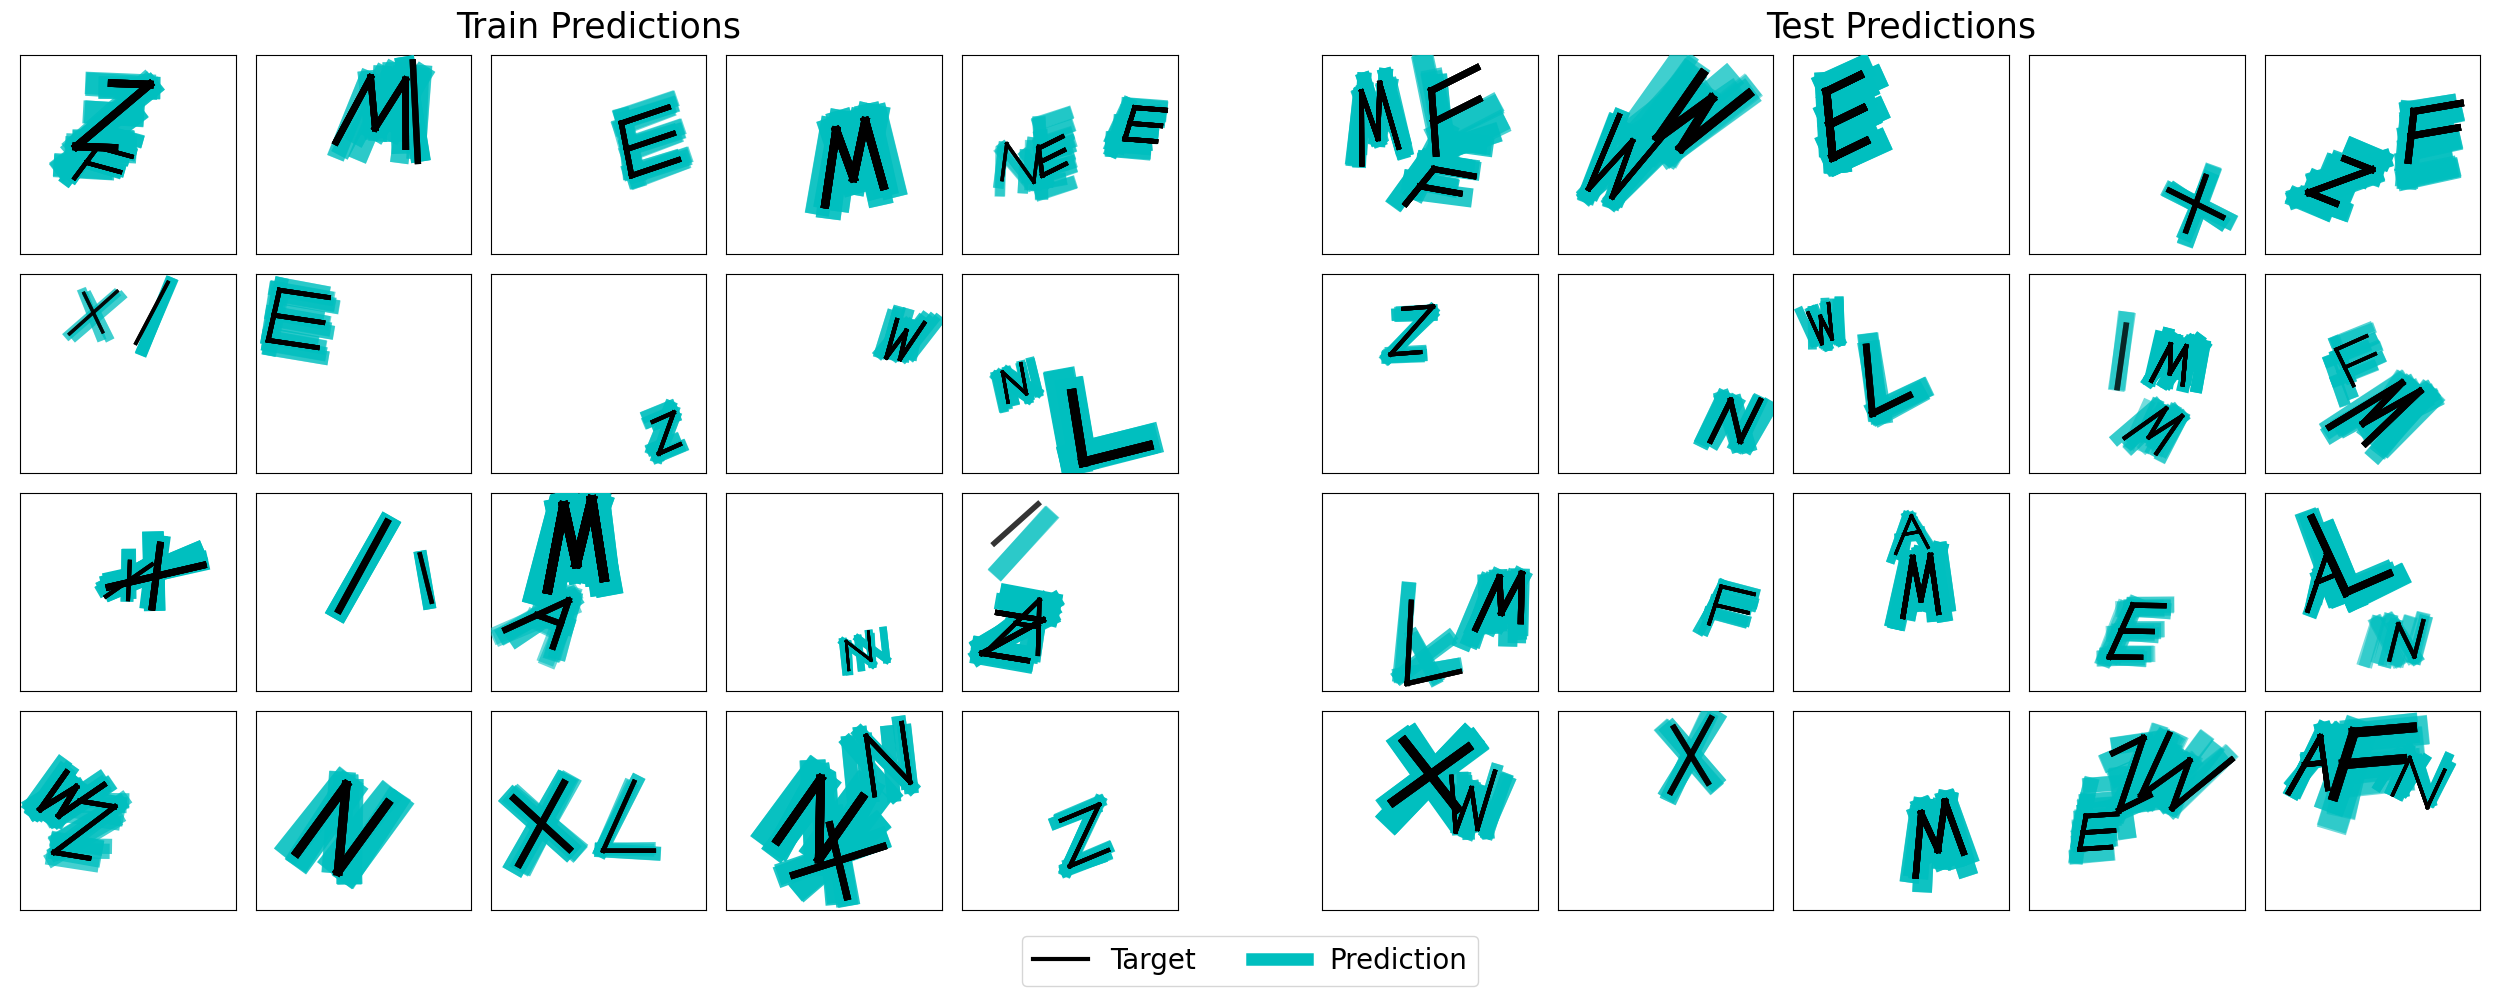

In [ ]:
!syndacate plotcharpredictions --model_name DeepSetToSet_PartsToChars
from jutility import plotting
plotting.show_ipython("results/train/DeepSetToSet_PartsToChars/char_predictions.png")

In [ ]:
# SetTransformer, PartsToClass
!syndacate train \
  --dataset PartsToClass \
  --model SetTransformer \
  --model.SetTransformer.pooler SetAverage \
  --model.SetTransformer.depth 5 \
  --trainer BpSpDe \
  --trainer.BpSpDe.n_train 300 \
  --trainer.BpSpDe.steps 5000 \
  --devices 0

cli: PartsToClass()
Loading from "./data/syndacate_aFfTh100n70000o1p4rTs1u10w100.npz"
cli: Identity()
cli: SetAverage()
cli: SetTransformer(depth=5, embedder=Identity(num_params=0), expand_ratio=2.0, heads=8, input_shape=[70000, 9, 6], model_dim=64, output_shape=[10], pooler=SetAverage(num_params=0))
cli: CrossEntropy()
cli: Adam(lr=0.001, params=<generator object Module.parameters at 0x7df106604e40>)
Time        | Step       | Epoch      | Batch      | Batch loss | Train metric | Test metric 
----------- | ---------- | ---------- | ---------- | ---------- | ------------ | ------------
0.0070s     |          0 |          0 |            |            |      0.09000 |      0.09280
0.6498s     |          0 |          0 |          0 |    2.34294 |              |             
1.0092s     |         30 |         10 |          0 |    2.17772 |              |             
2.0097s     |        112 |         37 |          1 |    0.59361 |              |             
3.0026s     |        195 |     

In [ ]:
# MLP (flat), PartsToClass
!syndacate train \
  --dataset PartsToClass \
  --model RzMlp \
  --model.RzMlp.embedder Flatten \
  --model.RzMlp.embedder.Flatten.n 2 \
  --model.RzMlp.depth 5 \
  --trainer BpSpDe \
  --trainer.BpSpDe.n_train 300 \
  --trainer.BpSpDe.steps 5000 \
  --devices 0

cli: PartsToClass()
Loading from "./data/syndacate_aFfTh100n70000o1p4rTs1u10w100.npz"
cli: Flatten(n=2)
cli: Identity()
cli: RzMlp(depth=5, embedder=Flatten(num_params=0), expand_ratio=2.0, input_shape=[70000, 9, 6], model_dim=100, output_shape=[10], pooler=Identity(num_params=0))
cli: CrossEntropy()
cli: Adam(lr=0.001, params=<generator object Module.parameters at 0x791467edce40>)
Time        | Step       | Epoch      | Batch      | Batch loss | Train metric | Test metric 
----------- | ---------- | ---------- | ---------- | ---------- | ------------ | ------------
0.0099s     |          0 |          0 |            |            |      0.11000 |      0.09330
0.4410s     |          0 |          0 |          0 |    3.18158 |              |             
1.0055s     |         95 |         31 |          2 |    0.53057 |              |             
2.0013s     |        344 |        114 |          2 |    0.00054 |              |             
3.0014s     |        599 |        199 |          2 

In [ ]:
# MLP (flat, 50k gradient steps), PartsToClass
!syndacate train \
  --dataset PartsToClass \
  --model RzMlp \
  --model.RzMlp.embedder Flatten \
  --model.RzMlp.embedder.Flatten.n 2 \
  --model.RzMlp.depth 5 \
  --trainer BpSpDe \
  --trainer.BpSpDe.n_train 300 \
  --trainer.BpSpDe.steps 50000 \
  --devices 0

cli: PartsToClass()
Loading from "./data/syndacate_aFfTh100n70000o1p4rTs1u10w100.npz"
cli: Flatten(n=2)
cli: Identity()
cli: RzMlp(depth=5, embedder=Flatten(num_params=0), expand_ratio=2.0, input_shape=[70000, 9, 6], model_dim=100, output_shape=[10], pooler=Identity(num_params=0))
cli: CrossEntropy()
cli: Adam(lr=0.001, params=<generator object Module.parameters at 0x78db7f040e40>)
Time        | Step       | Epoch      | Batch      | Batch loss | Train metric | Test metric 
----------- | ---------- | ---------- | ---------- | ---------- | ------------ | ------------
0.0068s     |          0 |          0 |            |            |      0.11000 |      0.09330
0.3286s     |          0 |          0 |          0 |    3.18158 |              |             
1.0013s     |        166 |         55 |          1 |    0.15532 |              |             
2.0023s     |        423 |        141 |          0 |    0.00028 |              |             
3.0039s     |        675 |        225 |          0 